In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Summary

I am using Google Play Store dataset which contains data about 10k apps. This dataset has 13 feature rows for each app. I downloaded it from kaggle. This data was created using web scraping. It is very useful for getting insights into how android platform works.

In [2]:
df = pd.read_csv('~/googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


First we will clean the data and remove all the null values. We also have an outlier which should be removed.

In [4]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [5]:
df = df.drop(df.index[10472])

In [6]:
df = df.dropna()

In [7]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [8]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

Above two cells are used for converting scrapped strings into useful numerical values for plotting effective graphs.

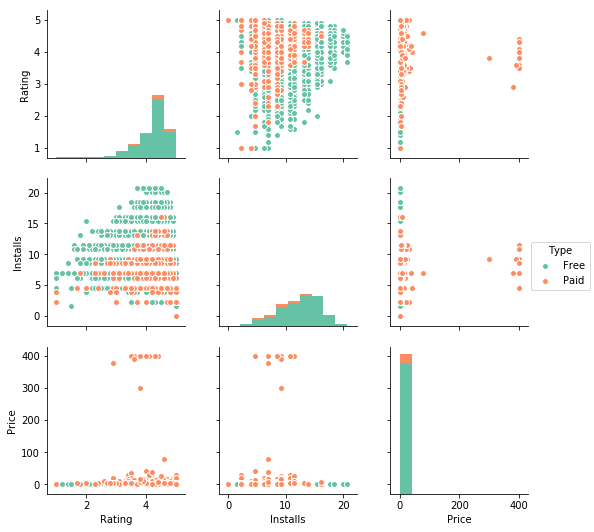

In [9]:
x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, np.log(z), t, price)), 
                        columns=['Rating', 'Installs', 'Type', 'Price']), hue='Type', palette="Set2")

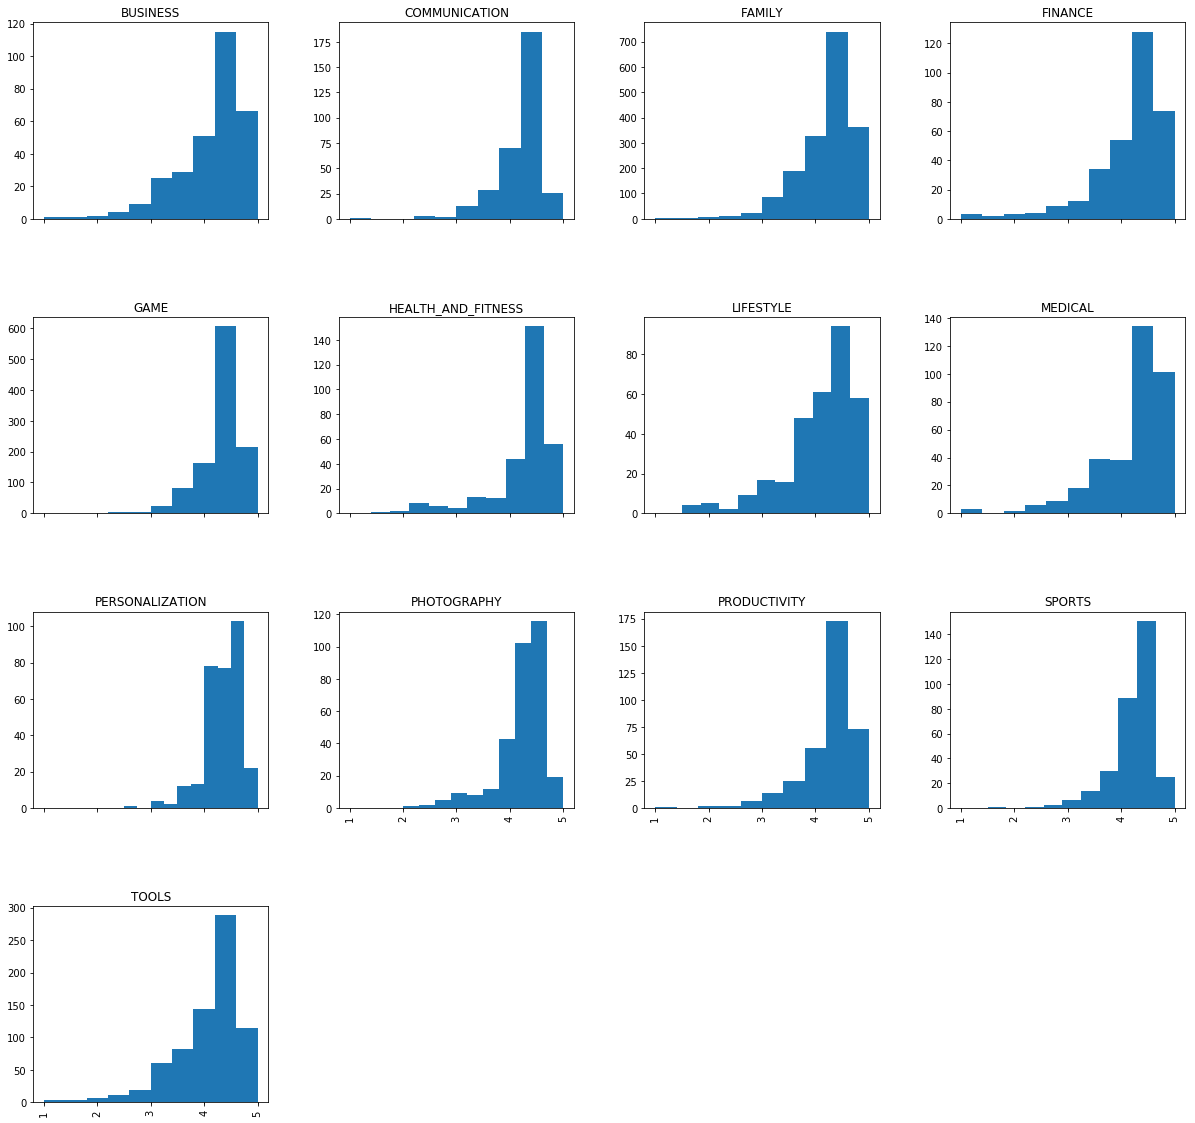

In [10]:
groups = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

These are different rating hist plots for different categories.

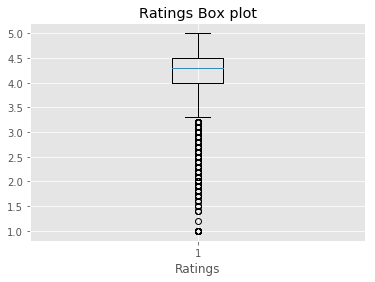

In [11]:
plt.style.use('ggplot')
plt.boxplot(df['Rating'])
plt.xlabel('Ratings')
plt.title('Ratings Box plot')
plt.show()

From above graph, we can conclude that average rating is 4.2, 75th percentile is 4.5 and 25th percentile is 4.0. But there are also many outliers under 3.3.

### Does size effect ratings of App?

/home/vivek/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


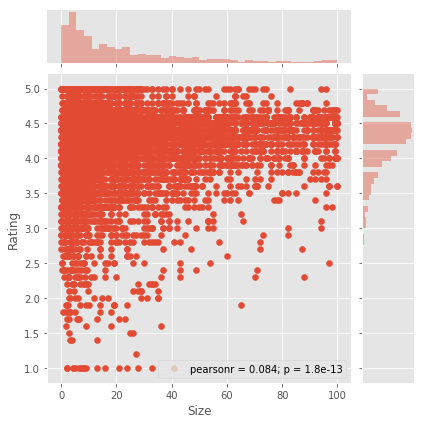

In [12]:
sns.jointplot(df['Size'], df['Rating'])

Most Rated apps are between 4 and 10 MB of size.

### Which category of apps are mostly liked by users?

In [13]:
df[df['Rating'] == 5]['Category'].value_counts()

FAMILY                 67
LIFESTYLE              29
MEDICAL                28
BUSINESS               18
TOOLS                  17
HEALTH_AND_FITNESS     12
GAME                   12
PERSONALIZATION        10
FINANCE                 8
PRODUCTIVITY            8
SOCIAL                  8
NEWS_AND_MAGAZINES      7
DATING                  6
EVENTS                  6
PHOTOGRAPHY             6
SHOPPING                6
BOOKS_AND_REFERENCE     6
COMMUNICATION           5
SPORTS                  4
TRAVEL_AND_LOCAL        3
FOOD_AND_DRINK          2
COMICS                  2
LIBRARIES_AND_DEMO      2
ART_AND_DESIGN          1
PARENTING               1
Name: Category, dtype: int64

We can clearly see that 'Family' apps are likely to get more ratings in comparison to other categories. But before getting any conclusions we should check the number of each category.

In [14]:
df['Category'].value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

This makes clear why we had such a large number of 5 star Family apps.

### Which Apps are most costly for each category?

In [15]:
Categories = [x for x in df["Category"].unique()]
for i in Categories:
    print("%s = %f$" % (i, df[df["Category"] == i]["Price"].max()))
    xyz = df[df["Category"] == i]
    if(xyz["Price"].max() > 0):
        print("Apps for this Category:")
        print(xyz[xyz["Price"] == xyz["Price"].max()]["App"])
    print("\n\n")

ART_AND_DESIGN = 1.990000$
Apps for this Category:
4755    X Launcher Pro: PhoneX Theme, OS11 Control Center
4759    X Launcher Pro - IOS Style Theme & Control Center
4764       X Launcher Prime: With OS Style Theme & No Ads
Name: App, dtype: object



AUTO_AND_VEHICLES = 1.990000$
Apps for this Category:
4216    Ulysse Speedometer Pro
Name: App, dtype: object



BEAUTY = 0.000000$



BOOKS_AND_REFERENCE = 4.600000$
Apps for this Category:
8927    Officiel du SCRABBLE LAROUSSE
Name: App, dtype: object



BUSINESS = 17.990000$
Apps for this Category:
6837    SkyTest BU/GU Lite
Name: App, dtype: object



COMICS = 0.000000$



COMMUNICATION = 4.990000$
Apps for this Category:
4282        K-@ Mail Pro - Email App
5083    AG Contacts, Premium edition
7999     Morse Decoder for Ham Radio
Name: App, dtype: object



DATING = 7.990000$
Apps for this Category:
481    AMBW Dating App: Asian Men Black Women Interra...
Name: App, dtype: object



EDUCATION = 5.990000$
Apps for this Category:
852 

We see that most constly Apps are on LIFESTYLE category with 400$.

### Future Research Proposal

For future research, we can try creating a model which predicts rating of a certain app. Using Rating and Installs columns as labels and other columns like Price, Size, Category as feature, we can create a model.

Other approach would be to check behaviour of Android users compared to iOS users. For this we would also need one iOS dataset with same features.